In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [51]:
fn_data = "../data/renewables_with_load.parquet"
ALL_COUNTRIES = [
    "DE",
    "AT",
    "BE",
    "BG",
    "HR",
    "CZ",
    "DK",
    "EE",
    "ES",
    "FI",
    "FR",
    "LT",
    "LU",
    "HU",
    "NL",
    "IT",
    "GR",
    "PL",
    "PT",
    "RO",
    # countries with no or likelyng solar data
    "NO",
    "SE",
    "LV",
]
ALL_COUNTRIES.sort()

## Plot profiles for all countries for a given year

In [42]:
def get_data(fn, year, aggregate_wind=True):
    start = pd.to_datetime(f"{year}/01/01 00:00")
    end = pd.to_datetime(f"{year}/12/31 23:00")
    df = pd.read_parquet(
        fn_data, 
        filters=[
            (f"dateTime", ">=", start),
            (f"dateTime", "<=", end)
        ],
    ).fillna(0)
    if aggregate_wind:
        df["wind"] = df["windOnshore"] + df["windOffshore"]
        df = df.drop(columns=["windOnshore", "windOffshore"], axis=1)
    return df
df_in = get_data(fn_data, year=2023, aggregate_wind=True)

df_in.copy()

,dateTime,country,solar,demand,wind
0,2023-01-01 00:00:00,AT,0.0,5280.80,921.00
1,2023-01-01 00:00:00,BA,0.0,826.36,0.00
2,2023-01-01 00:00:00,BE,0.0,7082.92,4175.47
3,2023-01-01 00:00:00,BG,0.0,3715.14,49.24
4,2023-01-01 00:00:00,CH,0.0,7373.01,46.45
...,...,...,...,...,...
285568,2023-12-31 23:00:00,RO,0.0,5176.50,1204.00
285569,2023-12-31 23:00:00,RS,0.0,4034.00,251.88
285570,2023-12-31 23:00:00,SE,0.2,16961.00,4647.08
285571,2023-12-31 23:00:00,SI,0.0,918.77,1.19


In [45]:
df_p = (
    df_in.assign(Month=lambda x: x["dateTime"].dt.month)
    .drop("dateTime", axis=1)
    .groupby(["Month", "country"], as_index=False)
    .mean()
)
df_p.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

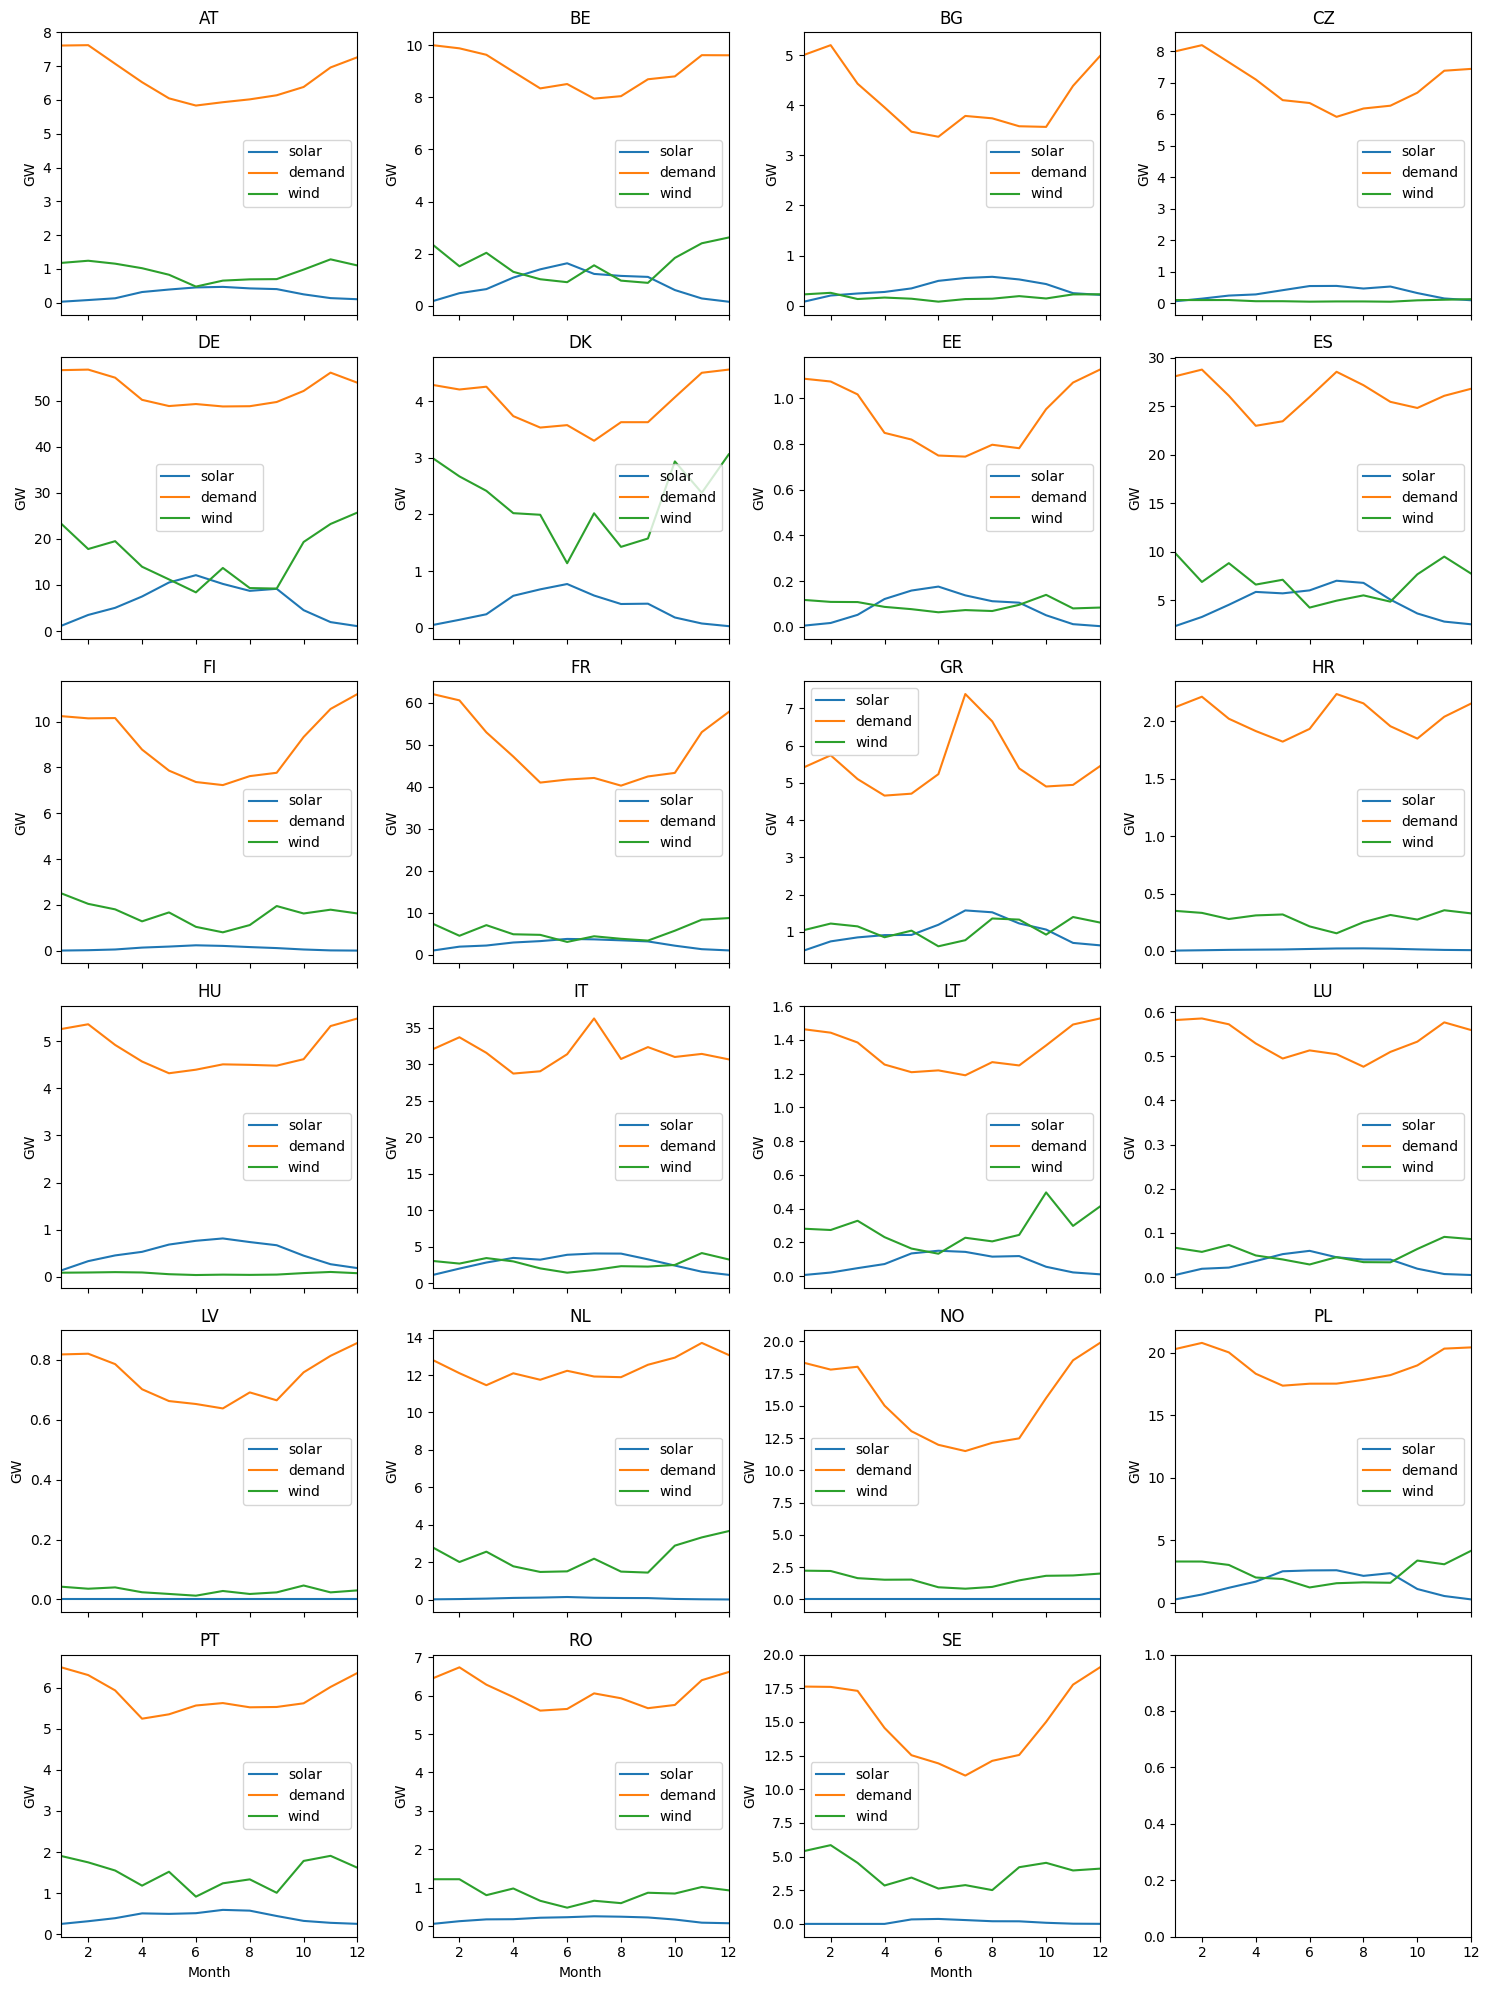

In [52]:
fig, axs = plt.subplots(6, 4, figsize=(15, 20), sharex=True)
axs = axs.flatten()
scale_me = ["wind", "solar", "demand"]
for i, c in enumerate(ALL_COUNTRIES):
    df_ = df_p[df_p["country"] == c]
    df_.loc[:, scale_me] = df_.loc[:, scale_me] / 1000
    df_.plot(x="Month", ax=axs[i], title=c)
    axs[i].set_ylabel("GW")
    axs[i].set_xlim(1,12)
len(ALL_COUNTRIES)
# increase space between subplots
plt.tight_layout()
plt.savefig("../figures/2023_monthly_production.png", bbox_inches="tight", dpi=300)